<a href="https://colab.research.google.com/github/coderanandmaurya/PBEL/blob/main/visualization_and_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [6]:
df=sns.load_dataset("tips")

In [9]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [11]:
df["smoker"]

,smoker
0,No
1,No
2,No
3,No
4,No
...,...
239,No
240,Yes
241,Yes
242,No


Univariate analysis involves the examination of a single variable. It aims to describe and summarize the characteristics of that variable. This analysis is often conducted using measures of central tendency (e.g., mean, median, mode) and measures of dispersion (e.g., range, variance, standard deviation). For example, analyzing the distribution of ages in a population would be a univariate analysis.
 Univariate analysis is the simplest form of data analysis and is often used to describe the characteristics of individual variables. It helps in understanding the characteristics of a single variable in isolation.

Bivariate analysis involves the examination of the relationship between two variables. It aims to determine how one variable changes in relation to another. This analysis is often conducted using correlation coefficients, scatter plots, and cross-tabulations. For example, studying the relationship between study hours and exam scores would be a bivariate analysis.
 Bivariate analysis involves the analysis of two variables simultaneously to determine if there is a relationship or association between them.

Multivariate analysis involves the examination of the relationship between multiple variables simultaneously. It aims to understand how multiple variables interact with each other. This analysis is often conducted using techniques such as multiple regression, factor analysis, and cluster analysis. For example, analyzing the impact of factors like age, income, and education on voting behavior would be a multivariate analysis.
 Multivariate analysis refers to the statistical procedure for analyzing the data involving more than two variables.

In [ ]:
# univariate analysis, bivariate analysis, multivariate analysis

In [14]:
df["smoker"].unique()

['No', 'Yes']
Categories (2, object): ['Yes', 'No']

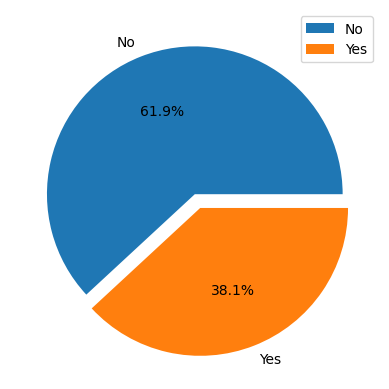

In [20]:
#univariate
df["smoker"]
plt.pie(df["smoker"].value_counts(),labels=df["smoker"].unique(),autopct="%.1f%%",explode=[0,0.1])
plt.legend()
plt.show()

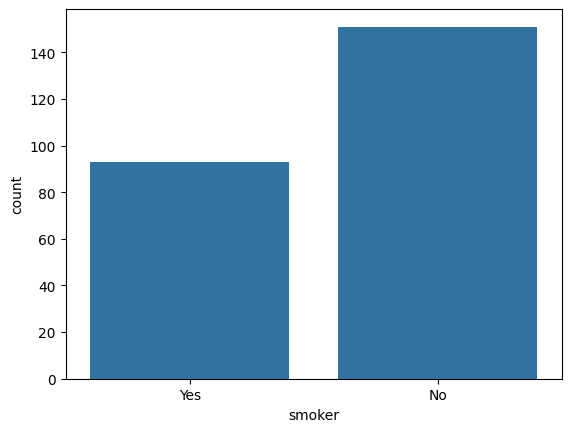

In [22]:
sns.countplot(x=df["smoker"])
plt.show()

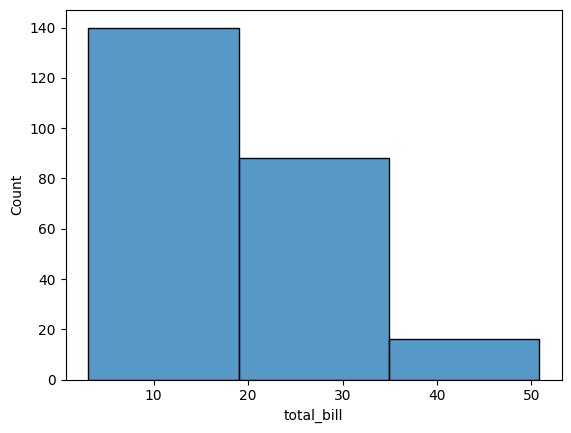

In [26]:
# numerical data
sns.histplot(df["total_bill"],bins=3)
plt.show()

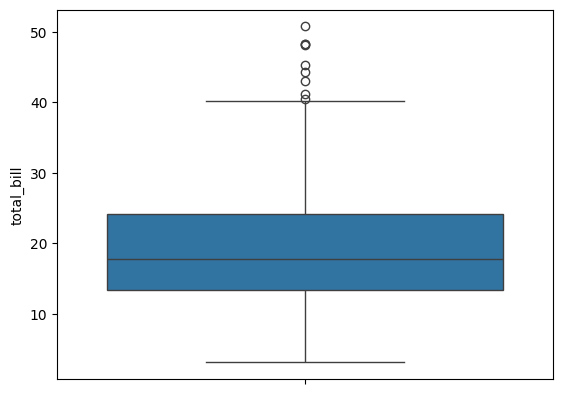

In [27]:
# box plot
sns.boxplot(df["total_bill"])
plt.show()

In [ ]:
# bivariate analysis

In [29]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

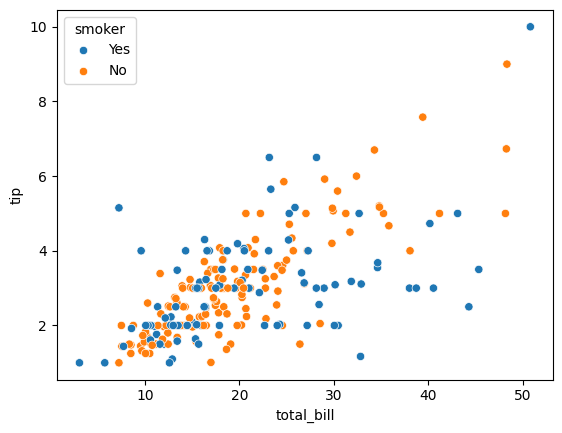

In [42]:
sns.scatterplot(x='total_bill',y="tip",data=df,hue="smoker")
plt.show()

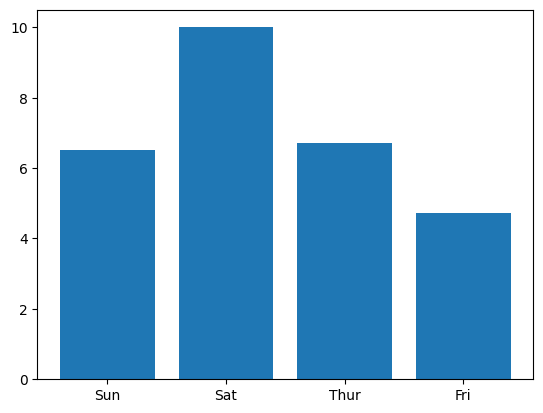

In [39]:
plt.bar(x=df["day"],height=df['tip'])
plt.show()

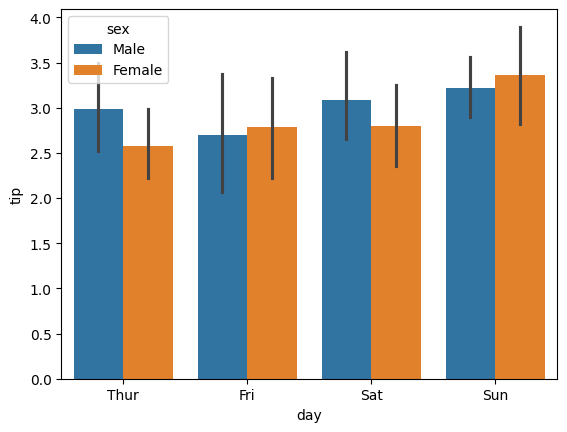

In [41]:
sns.barplot(x=df["day"],y=df['tip'],hue=df["sex"])
plt.show()

In [43]:
# multivariate analysis
px.scatter_3d(df,x="total_bill",y="tip",z="size",color="sex")

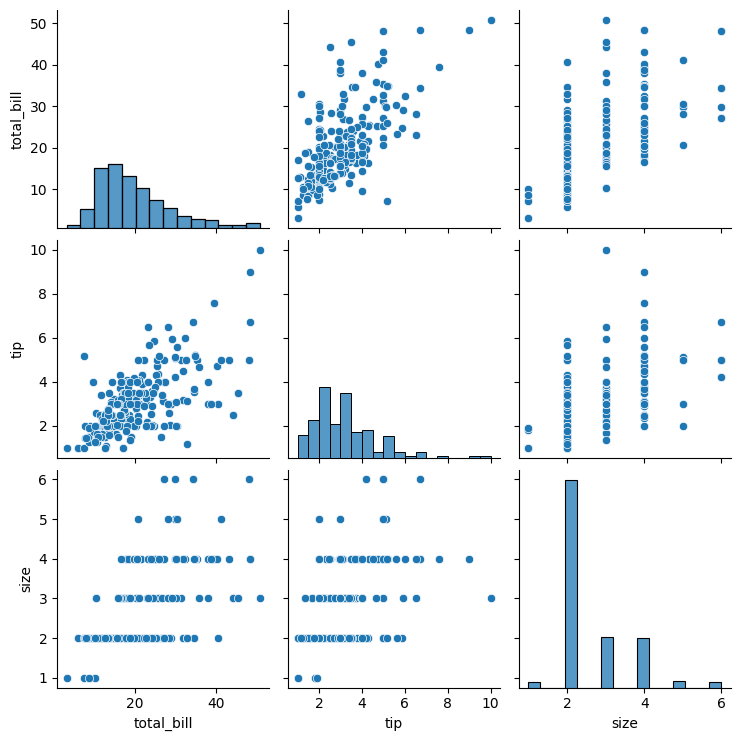

In [44]:
sns.pairplot(df)
plt.show()

In [46]:
df.sample()

,total_bill,tip,sex,smoker,day,time,size
92,5.75,1.0,Female,Yes,Fri,Dinner,2


In [52]:
# encoding
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()

In [63]:
df["day"]=Le.fit_transform(df['day'])

In [65]:
df["day"]

,day
0,2
1,2
2,2
3,2
4,2
...,...
239,1
240,1
241,1
242,1


In [64]:
df['day'].dtype

dtype('int64')

In [72]:
for x in df.columns:
  if df[x].dtype==object:
   Le.fit_transform(df[x],inplace=True)

In [78]:
# ordinal encoder
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
Oe=OrdinalEncoder()
OHE=OneHotEncoder()

In [76]:
df[["sex","smoker",'time']]=Oe.fit_transform(df[["sex","smoker",'time']])

In [77]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0.0,0.0,2,0.0,2
1,10.34,1.66,1.0,0.0,2,0.0,3
2,21.01,3.50,1.0,0.0,2,0.0,3
3,23.68,3.31,1.0,0.0,2,0.0,2
4,24.59,3.61,0.0,0.0,2,0.0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1.0,0.0,1,0.0,3
240,27.18,2.00,0.0,1.0,1,0.0,2
241,22.67,2.00,1.0,1.0,1,0.0,2
242,17.82,1.75,1.0,0.0,1,0.0,2


In [79]:
#OHE  male-female   two col   male 1,0  female 0,1
#LE   male -female 0,1
#OE  we can give multiple col

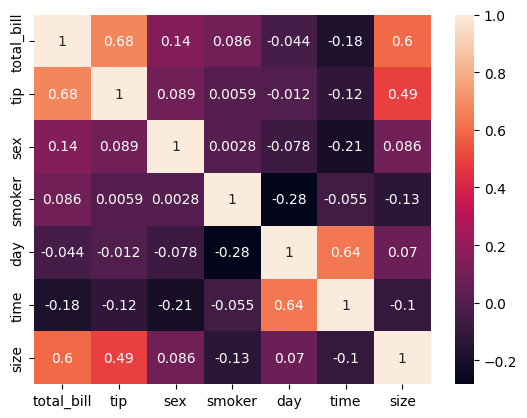

In [80]:
sns.heatmap(df.corr(),annot=True)
plt.show()